In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [2]:
df = pd.read_csv("MARUTI_data.csv")


In [3]:
df.tail(5)

,Date,open,high,low,close,adj_close,volume
3932,2019-05-09,6637.0,6678.000000,6600.0,6624.950195,6624.950195,570000.0
3933,2019-05-10,6623.0,6664.899902,6575.0,6631.600098,6631.600098,608669.0
3934,2019-05-13,6626.0,6659.299805,6500.0,6543.750000,6543.750000,555672.0
3935,2019-05-14,6511.0,6612.000000,6450.0,6576.200195,6576.200195,843313.0
3936,2019-05-15,6590.0,6640.000000,6560.0,6595.399902,6595.399902,190289.0


In [4]:
df.isnull().sum()

Date          0
open         19
high         19
low          19
close        19
adj_close    19
volume       19
dtype: int64

In [5]:
import seaborn as sns
sns.heatmap(df.corr())

In [6]:
X = df.iloc[:,[1,2,3]]
y = df.iloc[:,[4]]

In [7]:
X.shape

(3937, 3)

finding and handlling null values

In [8]:
df.isnull().sum()

Date          0
open         19
high         19
low          19
close        19
adj_close    19
volume       19
dtype: int64

In [9]:
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

C:\Users\YEDHU KRISHNAN\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


data visualistaion

In [10]:
# visualize the relationship between the features and the response using scatterplots
# sns.pairplot(df, x_vars='open', y_vars='close', height=17, aspect=7, kind='reg')

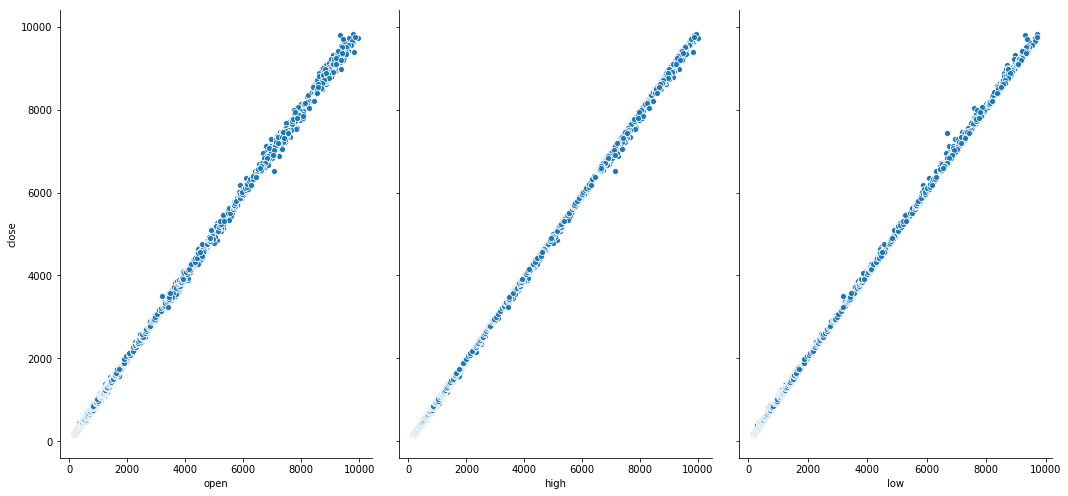

In [11]:
sns.pairplot(x_vars=['open','high','low'], y_vars='close', data=df, height=7, aspect=0.7)

splitting x and y into train and test dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

creating models

In [13]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [14]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
reg.coef_

array([[-0.65552796,  0.87342556,  0.78123803]])

checking accuracy

In [16]:
(reg.score(X_test, y_test))*100

99.98927373020773

In [17]:
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score
y_pred = reg.predict(X_test)
print(f'{median_absolute_error(y_test,y_pred)},{mean_absolute_error(y_test,y_pred)}, {r2_score(y_test,y_pred)}')

6.588151815423089,12.267219298657862, 0.9998927373020773


In [18]:
y_know = reg.predict([[7033,7014,6895],[6977,7156,6940],[7081,7450,7062]])
y_true =[[6975],[7124],[7302]]
y_know - y_true

array([[-72.95188035],
       [-26.06017341],
       [ 79.86307398]])

In [19]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit(X_train,y_train)
(reg.score(X_test, y_test))*100

99.98927373020773

polynomial features

In [20]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial(degree):
    "Creates a polynomial regression model for the given degree"
    poly_features = PolynomialFeatures(degree=degree)
    
    #transforming existing features to higher degree features
    X_train_poly = poly_features.fit_transform(X_train)
    
    #fiting transformed features into LR
    poly_model = linear_model.LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    #prediecting on traing dataset
    y_train_pred = poly_model.predict(X_train_poly)
    
    #prediceting on test dataset
    y_test_pred = poly_model.predict(poly_features.fit_transform(X_test))
    
    print(f'{median_absolute_error(y_test,y_test_pred)},{mean_absolute_error(y_test,y_test_pred)}, {r2_score(y_test,y_test_pred)}')

In [21]:
create_polynomial(2)

6.7536201992666065,12.379158240408923, 0.9998925548961187


In [22]:
ridge = linear_model.Ridge(fit_intercept=False)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score
y_pred = ridge.predict(X_test)
print(f'{median_absolute_error(y_test,y_pred)},{mean_absolute_error(y_test,y_pred)}, {r2_score(y_test,y_pred)}')

6.577577128483313,12.27646843927238, 0.9998924513082579


In [24]:
y_know = ridge.predict([[7033,7014,6895],[6977,7156,6940],[7081,7450,7062]])
y_true =[[6975],[7124],[7302]]
y_know - y_true

array([[-73.03585214],
       [-26.50746171],
       [ 78.85843663]])

In [25]:
y_know

array([[6901.96414786],
       [7097.49253829],
       [7380.85843663]])

finding acccuarcy of lasso alogrothim

In [26]:
lasso = linear_model.Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f'{median_absolute_error(y_test,y_pred)},{mean_absolute_error(y_test,y_pred)}, {r2_score(y_test,y_pred)}')

13.691028491399265,27.542136921207728, 0.9996470618360027


C:\Users\YEDHU KRISHNAN\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [27]:
y_know = lasso.predict([[7033,7014,6895],[6977,7156,6940],[7081,7450,7062]])
y_true =[[6975],[7124],[7302]]
y_know - y_true

array([[  31.67519894,   13.32453069,  152.12273629],
       [-117.32480106, -135.67546931,    3.12273629],
       [-295.32480106, -313.67546931, -174.87726371]])

In [28]:
y_know

array([7006.67519894, 6988.32453069, 7127.12273629])

using Bayassian regression

In [29]:
bayes = linear_model.BayesianRidge()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score
print(f'{median_absolute_error(y_test,y_pred)},-----{mean_absolute_error(y_test,y_pred)},------ {r2_score(y_test,y_pred)}')
y_know = bayes.predict([[7033,7014,6895],[6977,7156,6940],[7081,7450,7062]])
y_true =[[6975],[7124],[7302]]
print(f"{y_know - y_true}-------------{y_know}")

6.585624563056626,-----12.267205858774785,------ 0.9998927644934464
[[ -72.92902996  122.91363677  406.80066021]
 [-221.92902996  -26.08636323  257.80066021]
 [-399.92902996 -204.08636323   79.80066021]]-------------[6902.07097004 7097.91363677 7381.80066021]


C:\Users\YEDHU KRISHNAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


selecting model with heighest accuracy

In [30]:
reg = linear_model.LinearRegression()

In [34]:
reg.fit(X, y)
# y_pred = reg.predict(X_test)
# print(f'{median_absolute_error(y_test,y_pred)},{mean_absolute_error(y_test,y_pred)}, {r2_score(y_test,y_pred)}')
y_know = reg.predict([[7033,7014,6895],[6977,7156,6940],[7081,7450,7062]])
y_true =[[6975],[7124],[7302]]
print(f"{y_know - y_true}-------------\n\n\n{y_know}")

[[-67.19763322]
 [-28.30925533]
 [ 76.64478565]]-------------


[[6907.80236678]
 [7095.69074467]
 [7378.64478565]]


In [37]:
reg.predict([[7114.35,7378.50,7080.25]])

array([[7309.50373228]])